# Exploración de datos en python

En este notebook se presentan maneras de representar los datos mediantes gráficos; a su vez, se muestra la construcción de la función de distribución de probabilidad empírica para una variable.

In [1]:
# Importación de módulos/paquetes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
r="winequality-red.csv"

df = pd.read_csv(r, sep=";") # Se cargan los datos de un archivo csv
nombres= df.columns

Previo a la realización de cualquier análisis estadístico es fundamental realizar un análisis exploratorio de los datos, donde se pueden ver inicialmente comportaminetos que darán claridad y perspectiva para los análisis posteriores.

In [3]:
df.describe() # Descripción general de las observaciones

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Visualización

## Histogramas

Se usa el dataset de wine-quality para analizar sus características. Inicialente se realiza un histograma sobre la cantidad de alcohol de diferentes vinos

In [4]:
sns.set()    # Se habilita el módulo de seaborn para una visualización más estética

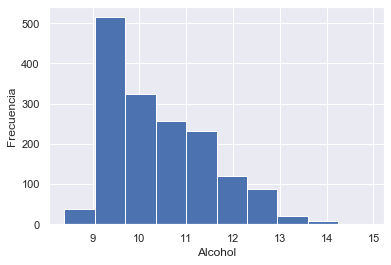

In [5]:
plt.hist(df.alcohol)       # Crear el histograma
plt.xlabel("Alcohol")      # Nombre del eje x
plt.ylabel("Frecuencia");  # Nombre del eje y

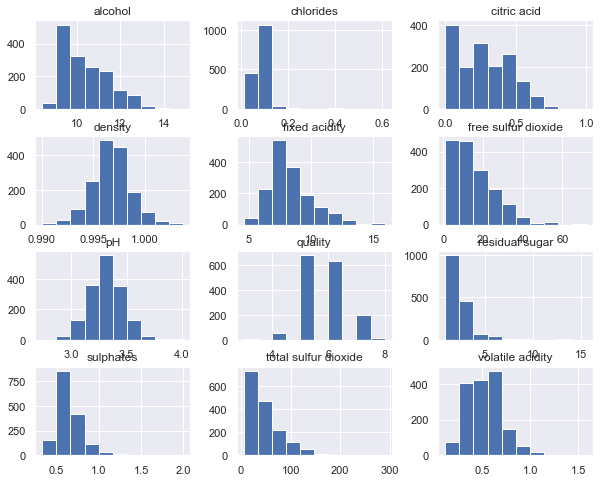

In [6]:
df.hist(figsize=(10,8));

## Diagrama de barras

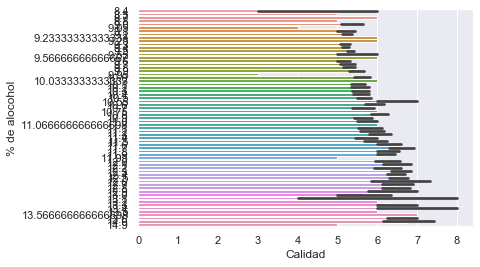

In [17]:
sns.barplot(x="quality",y="alcohol", data=df,orient="h")
plt.xlabel("Calidad")   # Nombre del eje x
plt.ylabel("% de alocohol");  # Nombre del eje y
plt.show()

## Mapa de calor

In [19]:
# Agrupar los valores medios por generación
df_1 = df.groupby(by="quality").mean()

In [20]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

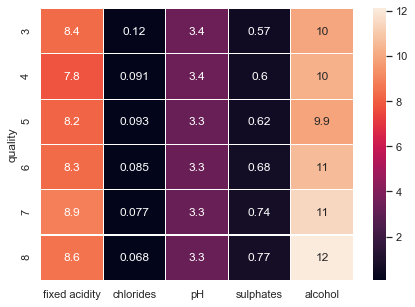

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(data=df_1[['fixed acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']],
            annot=True, linewidths=.1)
plt.show()

## Diagramas de enjambre (o de puntos)

Este tipo de diagrama permite ver que tan dispersas están las observaciones para cada una de las clases (en este caso para cada una de las calidades)

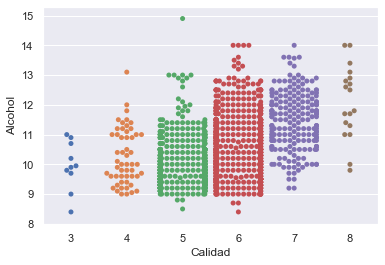

In [10]:
sns.swarmplot(x="quality", y="alcohol", data=df)
plt.xlabel("Calidad")
plt.ylabel("Alcohol")
plt.show()

También se podría realizar un gráfico de cajas para representar información adicional asociada con los percentiles

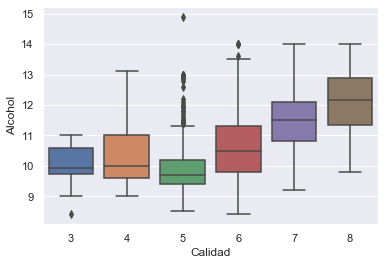

In [11]:
# Comparación de generaciones y puntos de ataque

sns.boxplot(x="quality", y="alcohol", data=df)
plt.xlabel("Calidad")
plt.ylabel("Alcohol")
plt.show()

Se observa que para el vino con la clasificación de calidad 5 existen varias observaciones atípicas, por lo que es posible explarar a detalle que sucede con esta clase

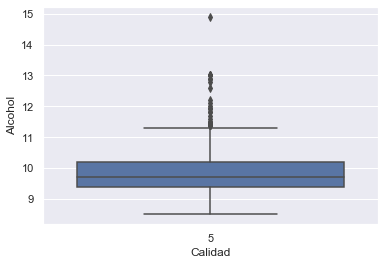

In [12]:
c_5 = df[df.quality == 5]  # Se crea una variable para que almacene solo los valores de calidad 5
sns.boxplot(x="quality", y="alcohol", data=c_5)
plt.xlabel("Calidad")
plt.ylabel("Alcohol")
plt.show()

In [13]:
c_5.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.0
mean,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,5.0
std,1.563988,0.164801,0.180003,1.359753,0.053707,10.955446,36.993116,0.001589,0.150618,0.171062,0.736521,0.0
min,5.000000,0.180000,0.000000,1.200000,0.039000,3.000000,6.000000,0.992560,2.880000,0.370000,8.500000,5.0
25%,7.100000,0.460000,0.090000,1.900000,0.074000,9.000000,26.000000,0.996200,3.200000,0.530000,9.400000,5.0
50%,7.800000,0.580000,0.230000,2.200000,0.081000,15.000000,47.000000,0.997000,3.300000,0.580000,9.700000,5.0
75%,8.900000,0.670000,0.360000,2.600000,0.094000,23.000000,84.000000,0.997900,3.400000,0.660000,10.200000,5.0
max,15.900000,1.330000,0.790000,15.500000,0.611000,68.000000,155.000000,1.003150,3.740000,1.980000,14.900000,5.0


## Gráfico de dispersión

En algunas situaciones también se desea evaluar el comportamiento de una variable cuando otra cambia, es decir, se busca evaluar si están correlacionadas. Una manera de visualizar esta correlación es mediante los gráficos de dispersión.

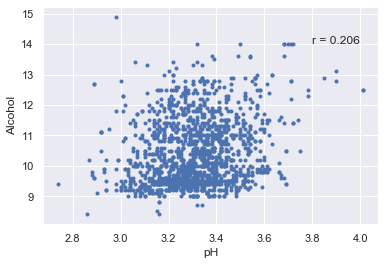

In [14]:
x = df["pH"]          # Se crea una variable x asociada al pH
y = df.alcohol     # Se crea una variable y asociada al alcohol

plt.plot(x, y, marker=".", linestyle="none") 
plt.xlabel("pH") 
plt.ylabel("Alcohol")
plt.text(3.8,14, "r = %.3f" % np.corrcoef(x,y)[0,1]); # Se agrega texto del coeficiente de correlación

Al igual que con los histogramas, es posible visualizar múltiples gráficos de dispersión en uno solo

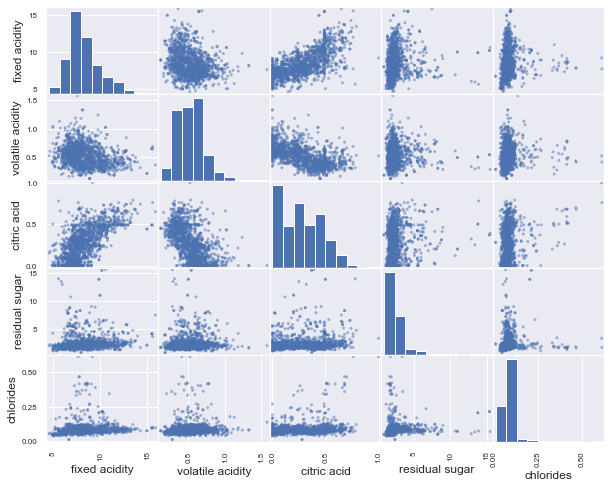

In [15]:
df_2 = df[nombres[:5]]      # Se toman las 5 primeras variables (para no hacer la figura tan grande)

pd.plotting.scatter_matrix(df_2, figsize=(10,8))
plt.show()